# CWI DATASET EVALUATIONS

## 1. LOADING DATA

In [1]:
from sklearn.metrics import classification_report
import csv
import spacy
import numpy as np
nlp=spacy.load('es_core_news_md')
pathgold_task1='GOLD/GOLD_CWI.csv'
pathgold_task2='GOLD/GOLD_SUBS.csv'
pathdemograph='CORPUS_DEMOGRAPH_EVAL.csv'
pathtask1='CORPUS_CWI_EVAL.csv'
pathtask2='CORPUS_SUBS_EVAL.csv'

In [2]:
def procesartasks(path):
    tsvin = open(path, "rt")
    tsvin = csv.reader(tsvin, delimiter=';')
    listatask1=list()
    for row in tsvin:
        listatemp=list()
        for element in row:
            if element != '':
                listatemp.append(element)
        listatask1.append(listatemp)
                
    return listatask1 

In [3]:
demographic=procesartasks(pathdemograph)
listatask1=procesartasks(pathtask1)
listagoldtask1=procesartasks(pathgold_task1)

In [4]:
#0=older, 1=intelectual dis, 2=control
demographic

[['1', '1', '65', '3', '1', '0'],
 ['2', '1', '70', '1', '2', '0'],
 ['3', '0', '70', '2', '1', '0'],
 ['4', '0', '55', '3', '1', '2'],
 ['5', '0', '20', '2', '0', '2'],
 ['6', '1', '81', '0', '4', '2'],
 ['7', '1', '53', '3', '2', '2'],
 ['8', '1', '65', '3', '3', '0'],
 ['9', '1', '69', '3', '1', '0'],
 ['10', '0', '66', '3', '1', '0'],
 ['11', '1', '18', '2', '2', '2'],
 ['12', '1', '70', '2', '0', '1'],
 ['13', '0', '71', '2', '0', '0'],
 ['14', '0', '76', '1', '0', '0'],
 ['15', '1', '76', '0', '0', '0'],
 ['16', '1', '70', '1', '2', '0'],
 ['17', '0', '74', '2', '3', '0'],
 ['18', '0', '66', '2', '1', '0'],
 ['19', '1', '67', '2', '2', '0'],
 ['20', '1', '65', '2', '2', '0'],
 ['21', '0', '70', '1', '3', '0'],
 ['22', '0', '72', '2', '1', '0'],
 ['23', '1', '72', '2', '1', '0'],
 ['24', '1', '68', '2', '1', '0'],
 ['25', '0', '74', '1', '1', '0'],
 ['26', '1', '69', '2', '3', '0'],
 ['27', '0', '49', '1', '0', '1'],
 ['28', '1', '39', '1', '1', '1'],
 ['29', '1', '43', '1', '1', 

In [5]:
listausuarios=list()
listausuariosmay=list()
listausuariosdic=list()
listausuariosctr=list()
for row in demographic:
    listausuarios.append([row[0],row[5]])
    if row[5]=='0':
        listausuariosmay.append(row[0])
    if row[5]=='1':
        listausuariosdic.append(row[0])
    if row[5]=='2':
        listausuariosctr.append(row[0])

In [6]:
dicmay=dict()
dicdisc=dict()
dicctr=dict()
for row in listatask1:   
    if row[0] in listausuariosmay:
        dicmay[row[0]]=0
    if row[0] in listausuariosdic:
        dicdisc[row[0]]=0
    if row[0] in listausuariosctr:
        dicctr[row[0]]=0
        

In [7]:
nlistausuariosmay=list()
nlistausuariosdic=list()
nlistausuariosctr=list()
nlistausuariosmay=dicmay.keys()
nlistausuariosdic=dicdisc.keys()
nlistausuariosctr=dicctr.keys()

In [8]:
def showpostags(path):
    cont=0
    for row in path:
        sentence = row[0]  # oracion
        spacyoracion=nlp(sentence)
        for j,token in enumerate(spacyoracion):
            print(token.pos_+" "+token.orth_)
        break
        
def getnumexamples(path):
    cont=0
    for row in path:
        sentence = row[0]  # oracion
        spacyoracion=nlp(sentence)
        for j,token in enumerate(spacyoracion):
            #print(token.text)
            if (token.pos_=='NOUN' or token.pos_=='VERB'or token.pos_=='INTJ' or token.pos_=='PROPN' or token.pos_=='ADJ'):
                #rint(token.text)
            #if (token.pos_=='NOUN' or token.pos_=='VERB' or token.pos_=='INTJ'):
                cont+=1
        #rint(cont)
    return cont

def getMatrix_traingold(path):
    # abrimos el fichero
    indexRow = 0
    conteo=getnumexamples(path)
    #matrix2 =np.empty([3861, 1])
    matrix = np.empty(shape=[conteo, 1])
    
    for row in path:
        listapalabras=list()
        rowlen=len(row)
        sentence = row[0]  # oracion
        spacyoracion=nlp(sentence)
        #print(sentence)
        #print(rowlen)
        #print(row)
        #cont=0
        cont=0
        for element in row:
            if element!='':
                listapalabras.append(element.lower())
        listapalabras.pop(0)
        print(listapalabras)
        #print(listapalabras)
        for j,token in enumerate(spacyoracion):
            #if (token.pos_=='ADV'):
            if (token.pos_=='NOUN' or token.pos_=='VERB'or token.pos_=='INTJ' or token.pos_=='PROPN' or token.pos_=='ADJ'):
                cont+=1
                if token.orth_.lower() in listapalabras:
                    matrix[indexRow] =1
                    indexRow += 1
                else:
                    matrix[indexRow] = 0
                    indexRow += 1
        #print(cont)
        #matrix2=np.concatenate((matrix2,matrix),axis=0)
    return matrix

def getnumexamplesuser(path,user):
    cont=0
    for row in path:
        if row[0]==str(user):
            sentence = row[1]  # oracion
            spacyoracion=nlp(sentence)
            for j,token in enumerate(spacyoracion):
                if (token.pos_=='NOUN' or token.pos_=='VERB'or token.pos_=='INTJ' or token.pos_=='PROPN' or token.pos_=='ADJ'):
                    #rint(token.text)
                    cont+=1
                    #print(token.text)
                #if (token.pos_=='NOUN' or token.pos_=='VERB' or token.pos_=='INTJ'):
            #rint(cont)
                    
    #print(cont)
    return cont

def getMatrix_trainuser(path,user):
    # abrimos el fichero
    indexRow = 0
    conteo=getnumexamplesuser(path,user)
    #matrix2 =np.empty([3861, 1])
    matrix = np.empty(shape=[conteo, 1])
    
    for row in path:
        if row[0]==str(user):
            listapalabras=list()
            rowlen=len(row)
            sentence = row[1]  # oracion
            spacyoracion=nlp(sentence)
            #print(sentence)
            #print(rowlen)
            #print(row)
            #cont=0
            cont=0
            for element in row:
                if element!='':
                    listapalabras.append(element.lower())
            listapalabras.pop(0)
            listapalabras.pop(0)
            #rint(listapalabras)
            for j,token in enumerate(spacyoracion):
                #if (token.pos_=='ADV'):
                if (token.pos_=='NOUN' or token.pos_=='VERB'or token.pos_=='INTJ' or token.pos_=='PROPN' or token.pos_=='ADJ'):
                    cont+=1
                    if token.orth_.lower() in listapalabras:
                        matrix[indexRow] =1
                        indexRow += 1
                    else:
                        matrix[indexRow] = 0
                        indexRow += 1
            #print(cont)
            #matrix2=np.concatenate((matrix2,matrix),axis=0)
    return matrix

In [9]:
matrixgold=getMatrix_traingold(listagoldtask1)

['predisposición', 'epilepsia', 'genética', 'anomalía']
['neurológico', 'neurológica', 'trastorno', 'epilepsia', 'epilepsia', 'discapacitante']
['prolongada', 'éxito', 'radica', 'plantea', 'retos', 'longevidad']
['pabellones', 'auriculares', 'globos', 'oculares']
['llagas', 'piezas ', 'dentales', 'prótesis', 'masticación']
['integral', 'odontológico', 'integral', 'servicio']
['habilidades', 'motrices', 'ejercitar', 'contexto']
['leptina', 'apetito', 'células', 'metabólico', 'hormona', 'adipocitos']
['enfermedades', 'endocrinológicas', 'prevalentes', 'incidencia']
['sustentado', 'marco', 'solidaridad', 'equidad', 'garantías', 'universalidad']
['llamamiento', 'difundir', 'promover', 'contribuyan', 'garantía']
['recreaciones', '3d', 'avance', 'virtuales', 'catálogos', 'fotogrametría']
['clave', 'vitamina', 'd', 'hormona', 'ósea', 'gestación']
['terapias', 'abordar', 'células', 'tejidos', 'genes']


In [10]:
listametricstodos=list()
matrixtotalGOLD = np.empty(shape=[0, 1])
matrixtotaluser = np.empty(shape=[0, 1])
for user in nlistausuariosmay:
    matrixuser=getMatrix_trainuser(listatask1,user)
    matrixtotalGOLD=np.concatenate((matrixtotalGOLD,matrixgold), axis=0)
    matrixtotaluser=np.concatenate((matrixtotaluser,matrixuser), axis=0)
print(len(matrixtotalGOLD))
for user in nlistausuariosdic:
    matrixuser=getMatrix_trainuser(listatask1,user)
    matrixtotalGOLD=np.concatenate((matrixtotalGOLD,matrixgold), axis=0)
    matrixtotaluser=np.concatenate((matrixtotaluser,matrixuser), axis=0)
print(len(matrixtotalGOLD))
for user in nlistausuariosctr:
    matrixuser=getMatrix_trainuser(listatask1,user)
    matrixtotalGOLD=np.concatenate((matrixtotalGOLD,matrixgold), axis=0)
    matrixtotaluser=np.concatenate((matrixtotaluser,matrixuser), axis=0)
print(len(matrixtotalGOLD))

2205
4410
6615


# 2. CALCULATE PLN METRICS

In [13]:
from sklearn.metrics import precision_recall_fscore_support as pr
from sklearn.metrics import accuracy_score as ac
from sklearn.metrics import f1_score
def Evaluation(matrixgold,matrixuser):
    y_dev=matrixuser
    X_dev=matrixgold
    #y_dev=matrixgold
    #X_dev=matrixuser
    #print(len(y_dev))
    #print(len(X_dev))
    # obtenemos precision, recall y f1 comparando el gold standard (y_dev) con las predicciones
    #predicted = self.model.predict(X_dev)
    bPrecis, bRecall, bFscore, bSupport = pr(y_dev, X_dev, average='macro')
    # mostramos resultados
    bAcuracy = ac(y_dev, X_dev)
    G1 = 2 * (bAcuracy * bRecall) / (bAcuracy + bRecall)
    f1x2=f1_score(y_dev, X_dev, average='macro')
    #print(bAcuracy,bPrecis, bRecall, bFscore, G1, f1x2)
    print(classification_report(y_dev, X_dev))
    return bAcuracy,bPrecis, bRecall, bFscore

# OLDER PEOPLE

#### PER USER

In [19]:
listametricsMAY=list()
for user in nlistausuariosmay:
    matrixuser=getMatrix_trainuser(listatask1,user)
    print(user)
    metricasnlp=Evaluation(matrixgold,matrixuser)
    #print("coeficiente kappa"+str(cohen))
    listametricsMAY.append([user,metricasnlp])

2
              precision    recall  f1-score   support

         0.0       1.00      0.56      0.72       144
         1.0       0.05      1.00      0.09         3

    accuracy                           0.57       147
   macro avg       0.52      0.78      0.40       147
weighted avg       0.98      0.57      0.71       147

13
              precision    recall  f1-score   support

         0.0       1.00      0.57      0.72       143
         1.0       0.06      1.00      0.11         4

    accuracy                           0.58       147
   macro avg       0.53      0.78      0.42       147
weighted avg       0.97      0.58      0.71       147

14
              precision    recall  f1-score   support

         0.0       0.94      0.64      0.76       118
         1.0       0.36      0.83      0.51        29

    accuracy                           0.68       147
   macro avg       0.65      0.74      0.63       147
weighted avg       0.82      0.68      0.71       147

15
        

#### ALL USERS 

In [14]:
listametricstodos=list()
matrixtotalGOLD = np.empty(shape=[0, 1])
matrixtotaluser = np.empty(shape=[0, 1])
for user in nlistausuariosmay:
    matrixuser=getMatrix_trainuser(listatask1,user)
    matrixtotalGOLD=np.concatenate((matrixtotalGOLD,matrixgold), axis=0)
    #print(len(matrixtotalGOLD))
    matrixtotaluser=np.concatenate((matrixtotaluser,matrixuser), axis=0)
    #print(len(matrixtotaluser))
metricasnlptodos=Evaluation(matrixtotalGOLD,matrixtotaluser)
print(metricasnlptodos)

              precision    recall  f1-score   support

         0.0       0.96      0.59      0.73      1982
         1.0       0.18      0.78      0.29       223

    accuracy                           0.61      2205
   macro avg       0.57      0.68      0.51      2205
weighted avg       0.88      0.61      0.68      2205

(0.6077097505668935, 0.56771417882529, 0.6842818550813827, 0.508162923763287)


# PEOPLE WITH INTELECTUAL DISABILITIES

#### PER USER

In [20]:
listametricsDISC=list()
for user in nlistausuariosdic:
    matrixuser=getMatrix_trainuser(listatask1,user)
    print(user)
    metricasnlp=Evaluation(matrixgold,matrixuser)
    #print("coeficiente kappa"+str(cohen))
    listametricsDISC.append([user,metricasnlp])

12
              precision    recall  f1-score   support

         0.0       0.99      0.56      0.71       143
         1.0       0.05      0.75      0.09         4

    accuracy                           0.56       147
   macro avg       0.52      0.65      0.40       147
weighted avg       0.96      0.56      0.70       147

27
              precision    recall  f1-score   support

         0.0       0.99      0.60      0.75       133
         1.0       0.20      0.93      0.32        14

    accuracy                           0.63       147
   macro avg       0.59      0.77      0.54       147
weighted avg       0.91      0.63      0.71       147

28
              precision    recall  f1-score   support

         0.0       0.99      0.58      0.73       138
         1.0       0.12      0.89      0.21         9

    accuracy                           0.60       147
   macro avg       0.55      0.73      0.47       147
weighted avg       0.93      0.60      0.70       147

29
       

#### ALL USERS

In [15]:
listametricstodos=list()
matrixtotalGOLD = np.empty(shape=[0, 1])
matrixtotaluser = np.empty(shape=[0, 1])
for user in nlistausuariosdic:
    matrixuser=getMatrix_trainuser(listatask1,user)
    matrixtotalGOLD=np.concatenate((matrixtotalGOLD,matrixgold), axis=0)
    #print(len(matrixtotalGOLD))
    matrixtotaluser=np.concatenate((matrixtotaluser,matrixuser), axis=0)
    #print(len(matrixtotaluser))
metricasnlptodos=Evaluation(matrixtotalGOLD,matrixtotaluser)
print(metricasnlptodos)

              precision    recall  f1-score   support

         0.0       0.95      0.60      0.74      1929
         1.0       0.22      0.79      0.34       276

    accuracy                           0.62      2205
   macro avg       0.59      0.69      0.54      2205
weighted avg       0.86      0.62      0.69      2205

(0.6235827664399093, 0.5862326973438085, 0.6948238555683277, 0.5401984371043016)


# CONTROL USERS

#### PER USER 

In [21]:
listametricsCTR=list()
for user in nlistausuariosctr:
    matrixuser=getMatrix_trainuser(listatask1,user)
    print(user)
    metricasnlp=Evaluation(matrixgold,matrixuser)
    #print("coeficiente kappa"+str(cohen))
    listametricsCTR.append([user,metricasnlp])

4
              precision    recall  f1-score   support

         0.0       0.96      0.56      0.71       139
         1.0       0.08      0.62      0.14         8

    accuracy                           0.56       147
   macro avg       0.52      0.59      0.42       147
weighted avg       0.91      0.56      0.68       147

5
              precision    recall  f1-score   support

         0.0       0.99      0.58      0.73       138
         1.0       0.12      0.89      0.21         9

    accuracy                           0.60       147
   macro avg       0.55      0.73      0.47       147
weighted avg       0.93      0.60      0.70       147

6
              precision    recall  f1-score   support

         0.0       0.99      0.58      0.73       139
         1.0       0.11      0.88      0.19         8

    accuracy                           0.59       147
   macro avg       0.55      0.73      0.46       147
weighted avg       0.94      0.59      0.70       147

7
           

#### ALL USERS

In [16]:
listametricstodos=list()
matrixtotalGOLD = np.empty(shape=[0, 1])
matrixtotaluser = np.empty(shape=[0, 1])
for user in nlistausuariosctr:
    matrixuser=getMatrix_trainuser(listatask1,user)
    matrixtotalGOLD=np.concatenate((matrixtotalGOLD,matrixgold), axis=0)
    #print(len(matrixtotalGOLD))
    matrixtotaluser=np.concatenate((matrixtotaluser,matrixuser), axis=0)
    #print(len(matrixtotaluser))
metricasnlptodos=Evaluation(matrixtotalGOLD,matrixtotaluser)
print(metricasnlptodos)

              precision    recall  f1-score   support

         0.0       0.98      0.58      0.73      2056
         1.0       0.12      0.81      0.21       149

    accuracy                           0.59      2205
   macro avg       0.55      0.69      0.47      2205
weighted avg       0.92      0.59      0.69      2205

(0.5931972789115646, 0.5495884773662552, 0.6947075836314731, 0.46911950578540396)


# PLN metrics for the entire population

In [17]:
listametricstodos=list()
matrixtotalGOLD = np.empty(shape=[0, 1])
matrixtotaluser = np.empty(shape=[0, 1])
for user in nlistausuariosmay:
    matrixuser=getMatrix_trainuser(listatask1,user)
    matrixtotalGOLD=np.concatenate((matrixtotalGOLD,matrixgold), axis=0)
    matrixtotaluser=np.concatenate((matrixtotaluser,matrixuser), axis=0)
for user in nlistausuariosdic:
    matrixuser=getMatrix_trainuser(listatask1,user)
    matrixtotalGOLD=np.concatenate((matrixtotalGOLD,matrixgold), axis=0)
    matrixtotaluser=np.concatenate((matrixtotaluser,matrixuser), axis=0)
for user in nlistausuariosctr:
    matrixuser=getMatrix_trainuser(listatask1,user)
    matrixtotalGOLD=np.concatenate((matrixtotalGOLD,matrixgold), axis=0)
    matrixtotaluser=np.concatenate((matrixtotaluser,matrixuser), axis=0)
metricasnlptodos=Evaluation(matrixtotalGOLD,matrixtotaluser)
print(metricasnlptodos)

              precision    recall  f1-score   support

         0.0       0.96      0.59      0.73      5967
         1.0       0.17      0.79      0.28       648

    accuracy                           0.61      6615
   macro avg       0.57      0.69      0.51      6615
weighted avg       0.89      0.61      0.69      6615

(0.6081632653061224, 0.5678451178451178, 0.6899509803921569, 0.5069595841019621)


# 3. PLOTTING DIFFERENT GRAPHICS

In [22]:
listametricstodos=list()
for i in range(len(listametricsMAY)):
    if listametricsMAY[i][0] in nlistausuariosmay:
        listametricsMAY[i].append('0')
    if listametricsDISC[i][0] in nlistausuariosdic:
        listametricsDISC[i].append('1')
    if listametricsCTR[i][0] in nlistausuariosctr:
        listametricsCTR[i].append('2')

In [24]:
listametricstodos=list()
for i in range(len(listametricsMAY)):
    listametricstodos.append([listametricsMAY[i][0],listametricsMAY[i][1][0],listametricsMAY[i][1][1],listametricsMAY[i][1][2],listametricsMAY[i][1][3],listametricsDISC[i][0],listametricsDISC[i][1][0],listametricsDISC[i][1][1],listametricsDISC[i][1][2],listametricsDISC[i][1][3],listametricsCTR[i][0],listametricsCTR[i][1][0],listametricsCTR[i][1][1],listametricsCTR[i][1][2],listametricsCTR[i][1][3]])

In [210]:
def procesarMETRICS(listametricstodosp):
    
    with open('listametricstodos.csv', mode='w', encoding='utf-8') as train_file:
        cont=0
        for row in listametricstodosp:
            train_writer = csv.writer(train_file, delimiter=';', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            train_writer.writerow([row[0],row[1],row[2],row[3],row[4],row[5],row[6],row[7],row[8],row[9],row[10],row[11],row[12],row[13],row[14]])

In [273]:
procesarMETRICS(listametricstodos)

In [25]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
df_listametricstodos=pd.DataFrame(listametricstodos)
df_listametricstodos=df_listametricstodos.rename(columns={0:"ID_MAY",1:'ACURACCY_MAY',2:'PRECISION_MAY',3:'RECALL_MAY',4:'F1_MAY',5:'ID_DISC',6:'ACURACCY_DISC',7:'PRECISION_DISC',8:'RECALL_DIC',9:'F1_DIC',10:'ID_CTR',11:'ACURACCY_CTR',12:'PRECISION_CTR',13:'RECALL_CTR',14:'F1_CTR'})

In [26]:
df_listametricstodos

,ID_MAY,ACURACCY_MAY,PRECISION_MAY,RECALL_MAY,F1_MAY,ID_DISC,ACURACCY_DISC,PRECISION_DISC,RECALL_DIC,F1_DIC,ID_CTR,ACURACCY_CTR,PRECISION_CTR,RECALL_CTR,F1_CTR
0,2,0.571429,0.522727,0.781250,0.403478,12,0.564626,0.516554,0.654720,0.400000,4,0.564626,0.519360,0.593076,0.422113
1,13,0.578231,0.530303,0.783217,0.418750,27,0.632653,0.592312,0.765038,0.536332,5,0.598639,0.554433,0.734300,0.471963
2,14,0.680272,0.650954,0.735827,0.634541,28,0.598639,0.554433,0.734300,0.471963,6,0.591837,0.546857,0.725270,0.458231
3,15,0.768707,0.750842,0.795896,0.753063,29,0.591837,0.548260,0.688321,0.467648,7,0.585034,0.539282,0.714286,0.444183
4,16,0.700680,0.675084,0.743623,0.666598,30,0.612245,0.572391,0.695455,0.514345,11,0.591837,0.546857,0.725270,0.458231
5,17,0.612245,0.572391,0.695455,0.514345,31,0.585034,0.556117,0.583426,0.530745,43,0.557823,0.507576,0.777397,0.371754
6,18,0.578231,0.530303,0.783217,0.418750,32,0.646259,0.613075,0.704776,0.583660,44,0.714286,0.698653,0.723485,0.699123
7,19,0.557823,0.507576,0.777397,0.371754,33,0.591837,0.559484,0.601081,0.525398,45,0.578231,0.530303,0.783217,0.418750
8,20,0.585034,0.540685,0.675121,0.454064,34,0.646259,0.607464,0.774094,0.560285,46,0.571429,0.524130,0.681690,0.415082
9,21,0.557823,0.510382,0.578169,0.396514,35,0.646259,0.608866,0.750646,0.566667,47,0.551020,0.501403,0.525862,0.368688


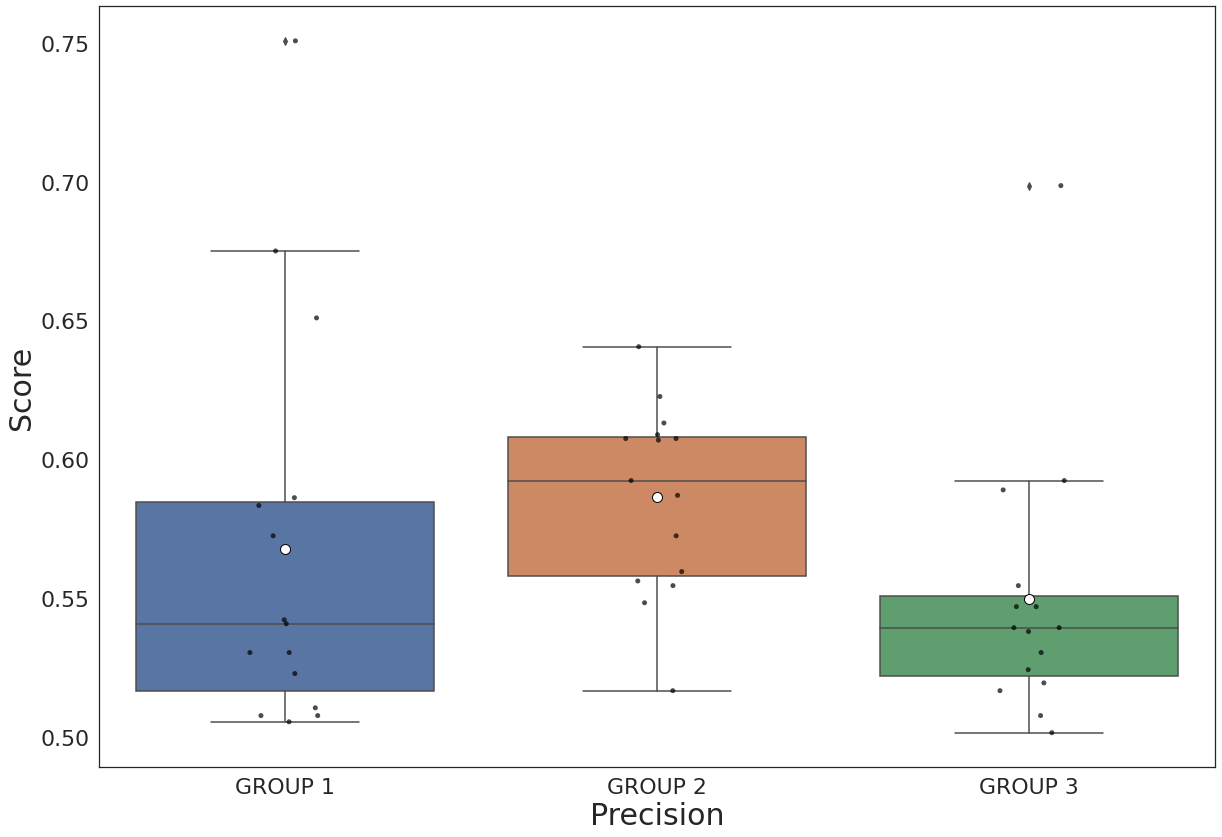

,PRECISION_MAY,PRECISION_DISC,PRECISION_CTR
count,15.000000,15.000000,15.000000
mean,0.567714,0.586233,0.549588
std,0.072319,0.033804,0.048620
min,0.505331,0.516554,0.501403
25%,0.516554,0.557800,0.521745
50%,0.540685,0.592312,0.539282
75%,0.584736,0.608165,0.550645
max,0.750842,0.640572,0.698653


In [28]:
dfTODOS = pd.DataFrame(data=df_listametricstodos, columns=["PRECISION_MAY","PRECISION_DISC","PRECISION_CTR"])
plt.figure(figsize=(20,14))
sb.set(font_scale=2)
sb.set_style("white")
boxplot = sb.boxplot(x="variable", y="value", data=pd.melt(dfTODOS),showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
boxplot = sb.stripplot(x="variable", y="value", data=pd.melt(dfTODOS), marker="o", alpha=0.7, color="black", order=["PRECISION_MAY","PRECISION_DISC","PRECISION_CTR"])
#boxplot.axes.set_title("METRICS BETWEEN GROUPS", fontsize=30)
boxplot.set_xlabel("Precision", fontsize=30)
boxplot.set_ylabel("Score", fontsize=30)
plt.xticks([0, 1,2], ['GROUP 1', 'GROUP 2','GROUP 3'])

plt.show()

dfTODOS.describe()

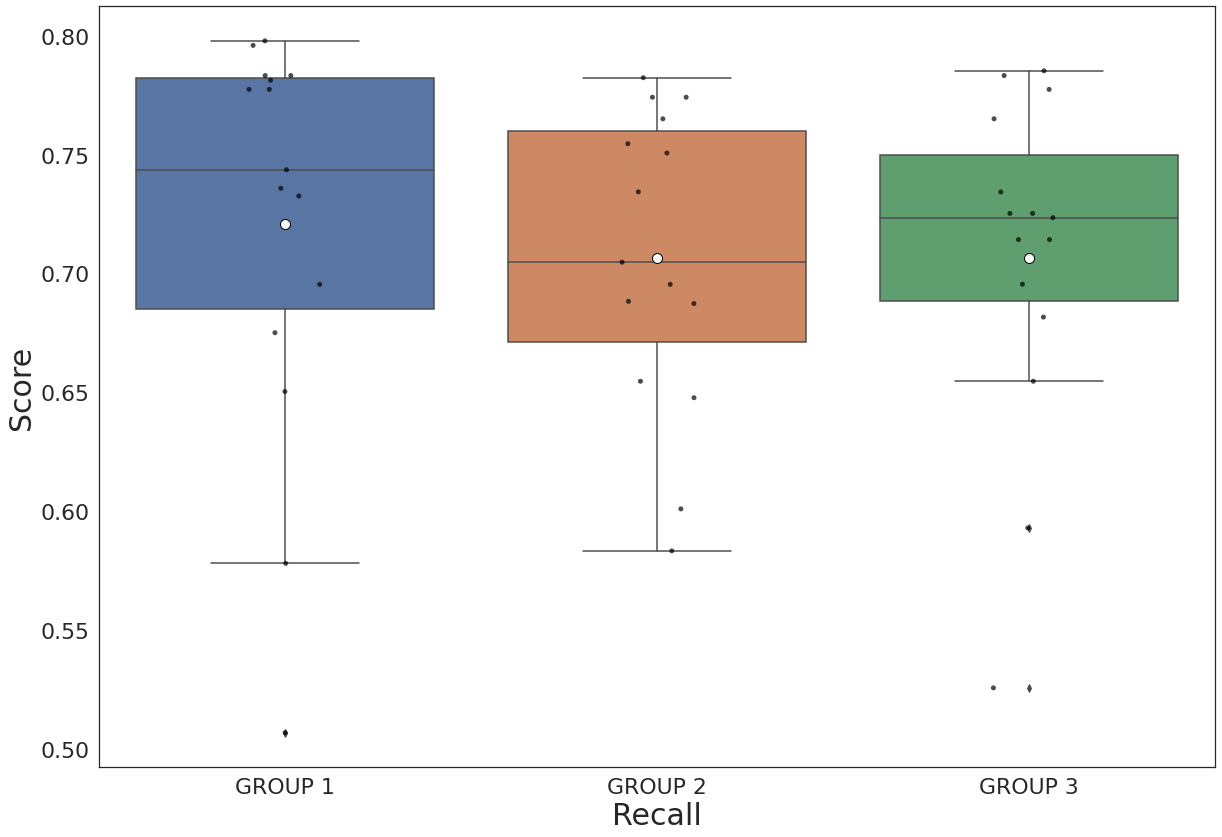

,RECALL_MAY,RECALL_DIC,RECALL_CTR
count,15.000000,15.000000,15.000000
mean,0.720956,0.706534,0.706575
std,0.086207,0.063556,0.071381
min,0.507002,0.583426,0.525862
25%,0.685288,0.671049,0.688604
50%,0.743623,0.704776,0.723485
75%,0.782233,0.759805,0.749669
max,0.797794,0.782300,0.785211


In [29]:
dfTODOS = pd.DataFrame(data=df_listametricstodos, columns=["RECALL_MAY","RECALL_DIC","RECALL_CTR"])
plt.figure(figsize=(20,14))
sb.set(font_scale=2)
sb.set_style("white")
boxplot = sb.boxplot(x="variable", y="value", data=pd.melt(dfTODOS),showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
boxplot = sb.stripplot(x="variable", y="value", data=pd.melt(dfTODOS), marker="o", alpha=0.7, color="black", order=["RECALL_MAY","RECALL_DIC","RECALL_CTR"])
#boxplot.axes.set_title("METRICS BETWEEN GROUPS", fontsize=30)
boxplot.set_xlabel("Recall", fontsize=30)
boxplot.set_ylabel("Score", fontsize=30)
plt.xticks([0, 1,2], ['GROUP 1', 'GROUP 2','GROUP 3'])

plt.show()

dfTODOS.describe()

In [243]:
listapalabrasdetectadas=list()
for user in nlistausuariosmay:
    numpalabrascomplejas=0
    for items in listatask1:
        if str(user)==items[0]:
            if items[2]!='0':
                numpalabrascomplejas+=(len(items)-2)
    listapalabrasdetectadas.append([user,numpalabrascomplejas])
    
for user in nlistausuariosdic:
    numpalabrascomplejas=0
    for items in listatask1:
        if str(user)==items[0]:
            if items[2]!='0':
                numpalabrascomplejas+=(len(items)-2)
    listapalabrasdetectadas.append([user,numpalabrascomplejas])  
    
for user in nlistausuariosctr:
    numpalabrascomplejas=0
    for items in listatask1:
        if str(user)==items[0]:
            if items[2]!='0':
                numpalabrascomplejas+=(len(items)-2)
    listapalabrasdetectadas.append([user,numpalabrascomplejas]) 
    

In [245]:
for i in range(len(listapalabrasdetectadas)):
    for element in demographic:
        if str(listapalabrasdetectadas[i][0])==element[0]:
            listapalabrasdetectadas[i].append(element[1])
            listapalabrasdetectadas[i].append(element[2])
            listapalabrasdetectadas[i].append(element[3])
            listapalabrasdetectadas[i].append(element[4])
            listapalabrasdetectadas[i].append(element[5])

In [247]:
df=pd.DataFrame(listapalabrasdetectadas)
df=df.rename(columns={0:"ID",1:'PALABRAS',2:'GENERO',3:'EDAD',4:'ESTUDIOS',5:'LECTURA',6:'ESTADO'})

In [249]:
dfnew=(df
       .groupby('PALABRAS')
       .ESTADO
       .value_counts()
       .unstack()
       .fillna(0)
)

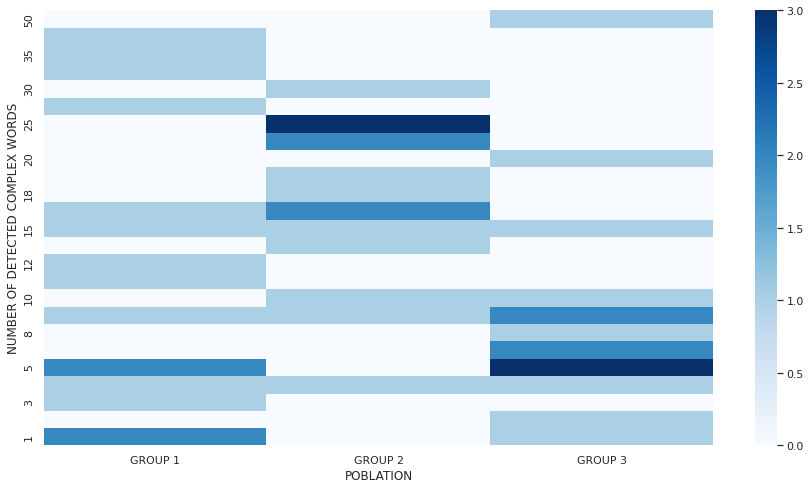

In [254]:
#25 discapacidad ###+1
#26 mayores
sb.set(font_scale=1)
X_axis=['GROUP 1','GROUP 2','GROUP 3']
heat_map = sb.heatmap(dfnew,xticklabels=X_axis,cmap='Blues',annot=False)
plt.xlabel("POBLATION")
plt.ylabel("NUMBER OF DETECTED COMPLEX WORDS")
plt.ylim(0,25)
plt.gcf().set_size_inches(15, 8)
plt.show()

# 4. SIGNIFICANCE TESTS

## 4.1 PRECISION

In [255]:
import pandas as pd
import numpy as np
import random
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind
from scipy.stats import t
seed(1)
df=pd.DataFrame(data=listastudent, columns=["MAYORES","DISCAPACIDAD","CONTROL"],dtype=float)
print(df.head())

    MAYORES  DISCAPACIDAD   CONTROL
0  0.781250      0.654720  0.593076
1  0.783217      0.765038  0.734300
2  0.735827      0.734300  0.725270
3  0.795896      0.688321  0.714286
4  0.743623      0.695455  0.725270


### NORMALITY TEST

In [123]:
listapoblacion=list()
for i in range(len(listametricsDISC)):
    listapoblacion.append([listametricsMAY[i][1][1]])
    listapoblacion.append([listametricsDISC[i][1][1]])
    listapoblacion.append([listametricsCTR[i][1][1]])

In [128]:
from scipy.stats import ttest_ind
from scipy.stats import t
from scipy import stats
peso=listapoblacion
k2, p_value = stats.normaltest(peso)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = [7.01436845], p-value = [0.02998122]


# WILCOXON

In [170]:
group1may=list()
group2disc=list()
group3ctr=list()
for i in range(len(listametricsDISC)):
    group1may.append(listametricsMAY[i][1][1])
    group2disc.append(listametricsDISC[i][1][1])
    group3ctr.append(listametricsCTR[i][1][1])

In [172]:
from scipy.stats import ranksums
ranksums(group1may, group2disc)

RanksumsResult(statistic=3.6708089993457054, pvalue=0.0002417839738742544)

In [173]:
ranksums(group2disc, group3ctr)

RanksumsResult(statistic=2.986420880823625, pvalue=0.0028226386759533724)

In [174]:
ranksums(group1may, group3ctr)

RanksumsResult(statistic=3.8367212705025735, pvalue=0.0001246878527628908)

# SHAPIRO

In [177]:
from scipy.stats import shapiro
shapiro(group1may)

(0.8226397633552551, 0.007286062464118004)

In [178]:
shapiro(group2disc)

(0.9524756669998169, 0.5642532110214233)

In [179]:
shapiro(group3ctr)

(0.7622686624526978, 0.0012545352801680565)

# KRUSKAL

In [175]:
stats.kruskal(group1may, group2disc, group3ctr)

KruskalResult(statistic=23.236787063889622, pvalue=8.999032090200104e-06)

# --- EDUCATION LEVEL (OLDER PEOPLE)

In [145]:
listametricsmayores=list()
for i in range(len(listametrics)):
    if listametrics[i][0] in nlistausuariosmay:
        listametricsmayores.append([listametrics[i][0],listametrics[i][1][0],listametrics[i][1][1],listametrics[i][1][2],listametrics[i][1][3],demographic[i][1],demographic[i][2],demographic[i][3],demographic[i][4]])

In [148]:
group0=list()
group1=list()
group2=list()
group3=list()
for elements in listametricsmayores:
    if elements[7]=='0':
        group0.append(elements[2])
    if elements[7]=='1':
        group1.append(elements[2])
    if elements[7]=='2':
        group2.append(elements[2])
    if elements[7]=='3':
        group3.append(elements[2])

In [149]:
from scipy import stats

#perform Kruskal-Wallis Test 
stats.kruskal(group0, group1, group2, group3)

KruskalResult(statistic=3.1847072879331, pvalue=0.36401425062382203)

# --READING EXPERIENCE (OLDER PEOPLE)

In [155]:
group0=list()
group1=list()
group2=list()
group3=list()
group4=list()
for elements in listametricsmayores:
    if elements[8]=='0':
        group0.append(elements[2])
    if elements[8]=='1':
        group1.append(elements[2])
    if elements[8]=='2':
        group2.append(elements[2])
    if elements[8]=='3':
        group3.append(elements[2])
    if elements[8]=='4':
        group4.append(elements[2])

In [156]:
stats.kruskal(group0, group1, group2, group3,group4)

KruskalResult(statistic=1.9921146953405082, pvalue=0.7372092993135891)

# 4.2 RECALL

In [182]:
listapoblacionrc=list()
for i in range(len(listametricsDISC)):
    listapoblacionrc.append([listametricsMAY[i][1][2]])
    listapoblacionrc.append([listametricsDISC[i][1][2]])
    listapoblacionrc.append([listametricsCTR[i][1][2]])

In [184]:
from scipy.stats import ttest_ind
from scipy.stats import t
from scipy import stats
peso=listapoblacionrc
k2, p_value = stats.normaltest(peso)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = [16.49078078], p-value = [0.00026247]


## WILCOXON

In [185]:
group1may=list()
group2disc=list()
group3ctr=list()
for i in range(len(listametricsDISC)):
    group1may.append(listametricsMAY[i][1][2])
    group2disc.append(listametricsDISC[i][1][2])
    group3ctr.append(listametricsCTR[i][1][2])

In [186]:
ranksums(group1may, group2disc)

RanksumsResult(statistic=-3.9196774060810076, pvalue=8.866757266712497e-05)

In [187]:
ranksums(group2disc, group3ctr)

RanksumsResult(statistic=-0.29034647452451906, pvalue=0.7715511878155722)

In [188]:
ranksums(group1may, group3ctr)

RanksumsResult(statistic=-3.7122870671349224, pvalue=0.00020539483890082976)

## KRUSKAL

In [189]:
stats.kruskal(group1may, group2disc, group3ctr)

KruskalResult(statistic=19.652675982072246, pvalue=5.401018105928768e-05)

# --- EDUCATION LEVEL (OLDER PEOPLE)

In [193]:
group0=list()
group1=list()
group2=list()
group3=list()
for elements in listametricsmayores:
    if elements[7]=='0':
        group0.append(elements[3])
    if elements[7]=='1':
        group1.append(elements[3])
    if elements[7]=='2':
        group2.append(elements[3])
    if elements[7]=='3':
        group3.append(elements[3])

In [194]:
stats.kruskal(group0, group1, group2, group3)

KruskalResult(statistic=2.100836320191166, pvalue=0.5517435885983357)

# -- READING EXPERIENCE (OLDER PEOPLE)

In [195]:
group0=list()
group1=list()
group2=list()
group3=list()
group4=list()
for elements in listametricsmayores:
    if elements[8]=='0':
        group0.append(elements[3])
    if elements[8]=='1':
        group1.append(elements[3])
    if elements[8]=='2':
        group2.append(elements[3])
    if elements[8]=='3':
        group3.append(elements[3])
    if elements[8]=='4':
        group4.append(elements[3])

In [196]:
stats.kruskal(group0, group1, group2, group3)

KruskalResult(statistic=6.091537895511403, pvalue=0.1072406516354224)